### Loading and prerequesites

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from germansentiment import SentimentModel
import statsmodels.api as sm

In [2]:
VARIANT = "LARGE" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df.pkl")

In [3]:
# Load the spacy model
nlp = spacy.load('de_core_news_sm')

# Use SentimentModel to predict sentiment for each text and add it to the dataframe in a new column
model = SentimentModel()

In [4]:
# This cell takes 72 minutes to run

# Split dataframe into dataframes of 500 rows each
dfs = np.array_split(df, len(df)/500)

# Iterate over dfs and predict sentiment for each text and add it to the dataframe in a new column
for i in range(len(dfs)):
    text = dfs[i]["text"]
    sentiment = model.predict_sentiment(text)
    dfs[i]["sentiment"] = sentiment

# Combine dataframes again
df = pd.concat(dfs)

In [5]:
# Function that gets a text and returns the number of sentences with positive, negative and neutral sentiment in that text
def get_sentiment(text):
    doc = nlp(text)
    sentences = []
    positive = 0
    negative = 0
    neutral = 0
    for sentence in doc.sents:
        sentences.append('\"' + sentence.text + '\"')

    sentiments = model.predict_sentiment(sentences)

    for sentiment in sentiments:
        if sentiment == "positive":
            positive += 1
        elif sentiment == "negative":
            negative += 1
        else:
            neutral += 1
    results = [positive, negative, neutral]
    return results

In [6]:
# This cell takes 384 minutes to run

# Iterate over df and predict sentiment for each sentence of each text and add the number of positive, neutral and negative sentences for each article to the dataframe in three new columns
for i in range(len(df)):
    # Get text
    text = df["text"][i]

    # Get nexis_id of text
    nexis_id = df["nexis_id"][i]

    # Get number of positive, neutral and negative sentences in text
    positive, negative, neutral = get_sentiment(text)

    # Save number of positive, neutral and negative sentences in dataframe for the specific text using the nexis_id
    df.loc[df["nexis_id"] == nexis_id, "positive"] = positive
    df.loc[df["nexis_id"] == nexis_id, "neutral"] = neutral
    df.loc[df["nexis_id"] == nexis_id, "negative"] = negative

In [3]:
# Add a column with the total number of sentences in each text
df["sentences"] = df["positive"] + df["neutral"] + df["negative"]

In [121]:
df

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment,positive,neutral,negative,sentences
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,neutral,0.0,49.0,0.0,49.0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,neutral,0.0,43.0,1.0,44.0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,neutral,2.0,39.0,2.0,43.0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,neutral,0.0,13.0,0.0,13.0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",neutral,0.0,39.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
5291,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,neutral,4.0,29.0,4.0,37.0
5292,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",neutral,0.0,20.0,0.0,20.0
5293,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,neutral,12.0,52.0,30.0,94.0
5294,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,neutral,4.0,168.0,4.0,176.0


In [122]:
df.to_pickle("../Data/df_sentiment.pkl")

In [135]:
df = pd.read_pickle("../Data/df_sentiment.pkl")
df

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment,positive,neutral,negative,sentences
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,neutral,0.0,49.0,0.0,49.0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,neutral,0.0,43.0,1.0,44.0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,neutral,2.0,39.0,2.0,43.0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,neutral,0.0,13.0,0.0,13.0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",neutral,0.0,39.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
5291,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,neutral,4.0,29.0,4.0,37.0
5292,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",neutral,0.0,20.0,0.0,20.0
5293,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,neutral,12.0,52.0,30.0,94.0
5294,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,neutral,4.0,168.0,4.0,176.0


### General overview

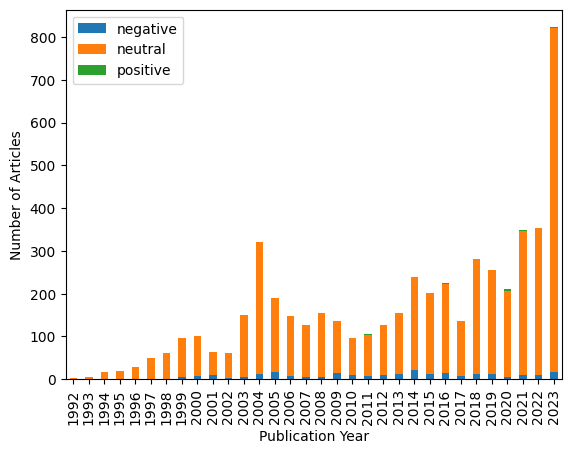

In [136]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/sentiment_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.037
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     1.154
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):              0.291
Time:                              13:42:45   Log-Likelihood:                 64.819
No. Observations:                        32   AIC:                            -125.6
Df Residuals:                            30   BIC:                            -122.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

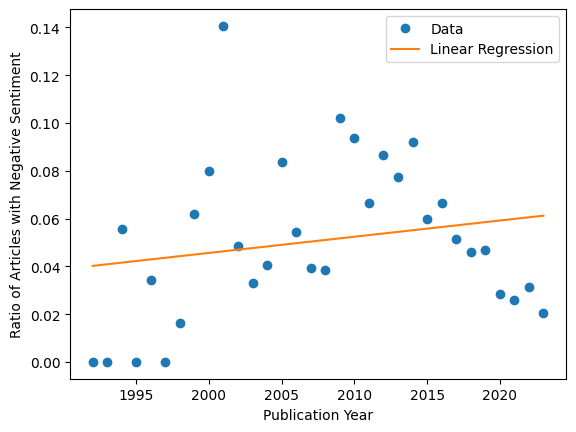

In [137]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/negative_sentiment_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.200
Model:                                  OLS   Adj. R-squared:                  0.173
Method:                       Least Squares   F-statistic:                     7.490
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):             0.0103
Time:                              13:42:45   Log-Likelihood:                 137.66
No. Observations:                        32   AIC:                            -271.3
Df Residuals:                            30   BIC:                            -268.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

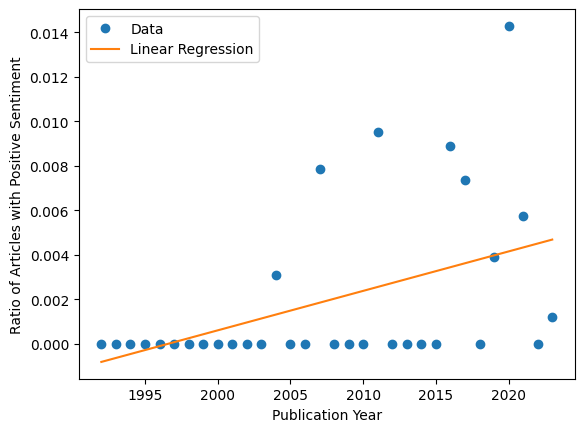

In [138]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/positive_sentiment_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.059
Model:                                 OLS   Adj. R-squared:                  0.028
Method:                      Least Squares   F-statistic:                     1.893
Date:                     Sun, 21 Jan 2024   Prob (F-statistic):              0.179
Time:                             13:42:45   Log-Likelihood:                 65.306
No. Observations:                       32   AIC:                            -126.6
Df Residuals:                           30   BIC:                            -123.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

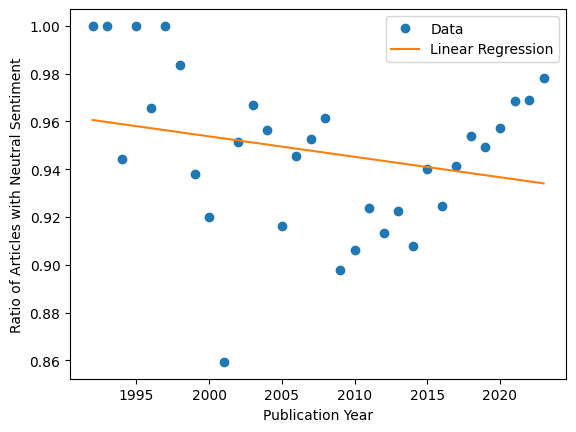

In [139]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/neutral_sentiment_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [140]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment,positive,neutral,negative,sentences
52,52C2HF41JBK921C10000000,"WELTREISE, TEIL 24",2011-03-11,2011,Auto Bild Allrad,"Wir machen eine Tour durch El Cafetal, die exp...",positive,4.0,7.0,1.0,12.0
372,61GPT7C1JBK921C40000000,Prophetische Science-Fiction,2020-12-10,2020,Bilanz.de,"Es ist eine Weile her, dass sich alte Ideen vo...",positive,2.0,48.0,7.0,57.0
401,60YG3FC1DY2BS0NC0000000,"""Es gibt kein veganes Fleisch""",2020-09-30,2020,Blick,Das finde ich super! Leider vergisst man oft d...,positive,3.0,11.0,15.0,29.0
538,67JBGC51JDMNJ06M0000000,Kommentar : Klare Worte,2023-02-14,2023,Bürstädter Zeitung (Germany),Die Zunahme der Weltbevölkerung und geänderte ...,positive,1.0,13.0,0.0,14.0
691,64CGHB91DY69V2HP0000000,Geboren für die ­großen Chancen,2021-12-24,2021,Der Spiegel,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0
1229,61FS4M51DY2BS22Y0000000,Vorsprung durch Biotechnik,2020-12-06,2020,Welt am Sonntag,"Es ist eine Weile her, dass sich alte Ideen vo...",positive,2.0,49.0,5.0,56.0
1265,5JTBM6T1JDPTM5090000000,Arznei mit Nebenwirkungen,2016-05-19,2016,Die ZEIT (inklusive ZEIT Magazin),Dank einiger Whistleblower wurde nun der Beipa...,positive,4.0,13.0,3.0,20.0
1287,64HSHS91JDPTM1840000000,Arznei mit Nebenwirkungen,2016-05-19,2016,Die ZEIT (inklusive ZEIT Magazin),Dank einiger Whistleblower wurde nun der Beipa...,positive,4.0,13.0,3.0,20.0
1853,4PX69490TWH7K0V90000000,kino: das kommt gut,2007-10-16,2007,Frankfurter Rundschau,"VON VOLKER MAZASSEK Die Reise der Pinguine"" fa...",positive,0.0,12.0,3.0,15.0
2233,5PGBB5S1DYJRP2P70000000,VEGGIE STATT WURST,2017-09-14,2017,Kölner Stadt-Anzeiger,Einige wenige schreckliche Bilder von eingepfe...,positive,2.0,8.0,1.0,11.0


In [141]:
print(df[df['nexis_id'] == '60YG3FC1DY2BS0NC0000000']['text'].values[0])
print(df[df['nexis_id'] == '5PGBB5S1DYJRP2P70000000']['text'].values[0])
print(df[df['nexis_id'] == '4CRXN950TWB673090000000']['text'].values[0])

Das finde ich super! Leider vergisst man oft die Allergiker bei der Entwicklung solcher Produkte. Es gibt sehr viele Menschen, die allergisch auf Hülsenfrüchte reagieren. Es sollten auch Alternativen zur Erbse verwendet werden. PATRIZIO MICCOLI, ZÜRICH Wem diese chemischen Produkte schmecken, der darf sie gerne geniessen. Nur, dass solche Produkte Bezeichnungen tragen, die zu Verwechslungen führen können, gehört verboten. Es gibt kein veganes Fleisch, keinen veganen Fisch und keine vegane Milch. WILLI FRISCHKNECHT, HERISAU AR Ich hoffe, Nestlé macht sich Gedanken über seinen exzessiven Verpackungswahnsinn seiner CO?-neutralisierten Lebensmittel. STEFAN BRUNNER, NIEDERLENZ AG Das sind Dinge, die wir nicht brauchen, das ist ein Luxusproblem. Ich frage mich, warum veganes Essen gleich heissen muss wie Produkte mit Fleisch oder Fisch. MARC MEIER, WINTERTHUR ZH Konventionell angepflanzte Nahrungsmittel sind alles andere als klimafreundlich. Bio ist nicht nur besser für den eigenen Körper, s

### Further analysis of negative articles

In [142]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment,positive,neutral,negative,sentences
14,5JTVGKD1DXG7T2F00000000,Befürchtungen,2016-05-21,2016,Appenzeller Zeitung,"Es geht um die Frage, welche Sicherheitsanford...",negative,0.0,18.0,0.0,18.0
118,5Y0NS431DY2BS32W0000000,SO NICHT !,2020-01-17,2020,Beobachter,"Nichts geliefert, nichts gesagt Im August habe...",negative,2.0,15.0,6.0,23.0
141,4HK49440TWX271SV0000000,Gen gleich böse?,2004-01-13,2004,None,Genfood. Klingt fremd. Ist künstlich. Erweckt ...,negative,1.0,4.0,7.0,12.0
148,4HSW9T60TWX2730J0000000,Listige Ministerin trickst Gen-Mais aus BESCHL...,2004-06-19,2004,None,Berlin - Mit cleveren Änderungen in der Gesetz...,negative,1.0,12.0,2.0,15.0
151,4NY9MRJ0TWX2722K0000000,Seehofer mit Gen- Tricks,2007-06-12,2007,None,Die Mehrheit der Deutschen will kein Gen-Food....,negative,1.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
5188,7XVMX1R0YC41B27G0000000,Widerstandsnomadin auf TalkshowTour,2010-02-22,2010,Welt kompakt,Dabei mag Vollzeitaktivistin Poddig es überhau...,negative,2.0,83.0,7.0,92.0
5202,5942J5N1JDRK84360000000,Kunstfleisch,2013-08-05,2013,WELT ONLINE (Deutsch),"Ladies first, natürlich. Ob das in dieser Situ...",negative,1.0,54.0,7.0,62.0
5227,5RPPGT61F16N03ND0000000,Schmetterlinge im Bauch,2018-02-22,2018,WELT ONLINE (Deutsch),Okidoki. Das war ja eigentlich klar. Früher od...,negative,1.0,25.0,9.0,35.0
5236,5VCB9581F16N04P30000000,"""Schmeckt wie Kaninchen""",2019-02-07,2019,WELT ONLINE (Deutsch),"Es schmeckt fast genauso wie Kaninchen, ist le...",negative,1.0,24.0,5.0,30.0


In [143]:
print(df[df['nexis_id'] == '5JTVGKD1DXG7T2F00000000']['text'].values[0])
print(df[df['nexis_id'] == '4HK49440TWX271SV0000000']['text'].values[0])
print(df[df['nexis_id'] == '5VCB9581F16N04P30000000']['text'].values[0])

Es geht um die Frage, welche Sicherheitsanforderungen ein Auto erfüllen muss. Oder um die Frage, ob im Supermarktregal gentechnisch veränderte Lebensmittel stehen. Es geht also um zentrale Aspekte des Alltags. Werden diese Fragen unter Ausschluss der Öffentlichkeit verhandelt, ist Widerstand vorprogrammiert. Die Kritik am geplanten Freihandelsabkommen zwischen der EU und den USA (TTIP) ist deshalb nicht erstaunlich. Zwar ist es üblich, dass internationale Verträge von Unterhändlern hinter verschlossenen Türen ausgehandelt werden. TTIP ist aber kein gewöhnliches Freihandelsabkommen. Mit der EU und den USA sitzen zwei Giganten am Verhandlungstisch. Und beide streben ein umfassendes Abkommen an, das weit über den Zollabbau hinausgeht. Gerade die EU, die sich in einer Vertrauenskrise befindet und die sich immer wieder dem Vorwurf des Demokratiedefizits ausgesetzt sieht, hätte die Sprengkraft des Unterfangens erkennen und für eine gewisse Transparenz sorgen müssen. Sie tat es lange Zeit nic

### Analysis per sentence

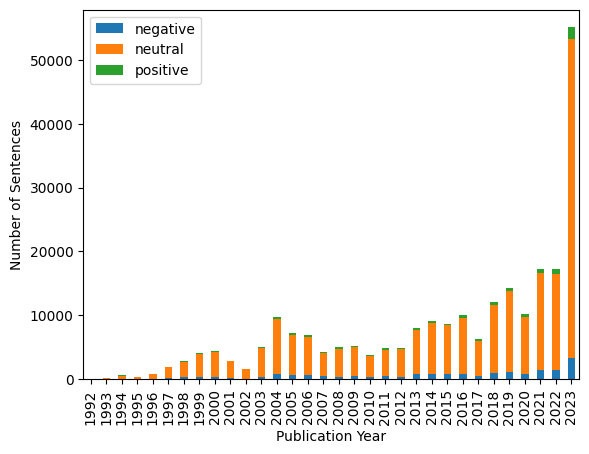

In [144]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/sentiment_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.027
Model:                                  OLS   Adj. R-squared:                 -0.005
Method:                       Least Squares   F-statistic:                    0.8313
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):              0.369
Time:                              13:42:45   Log-Likelihood:                 92.260
No. Observations:                        32   AIC:                            -180.5
Df Residuals:                            30   BIC:                            -177.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

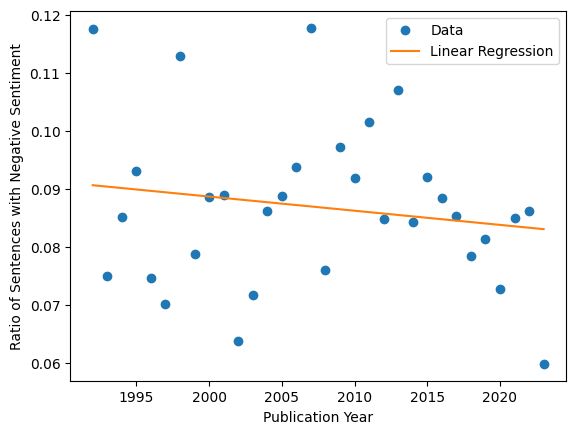

In [145]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/negative_sentiment_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.007
Model:                                  OLS   Adj. R-squared:                 -0.026
Method:                       Least Squares   F-statistic:                    0.2242
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):              0.639
Time:                              13:42:46   Log-Likelihood:                 93.066
No. Observations:                        32   AIC:                            -182.1
Df Residuals:                            30   BIC:                            -179.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

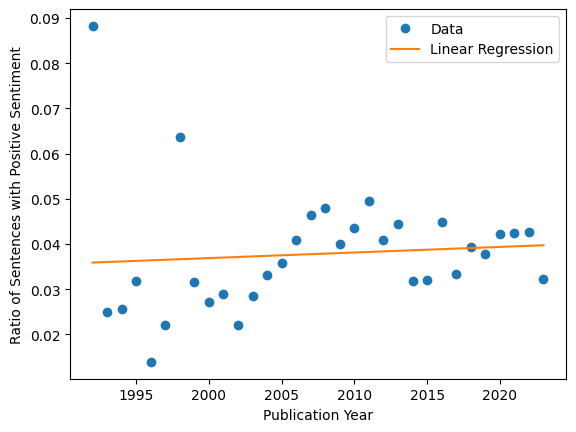

In [146]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/positive_sentiment_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.031
Method:                      Least Squares   F-statistic:                   0.06048
Date:                     Sun, 21 Jan 2024   Prob (F-statistic):              0.807
Time:                             13:42:46   Log-Likelihood:                 72.920
No. Observations:                       32   AIC:                            -141.8
Df Residuals:                           30   BIC:                            -138.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

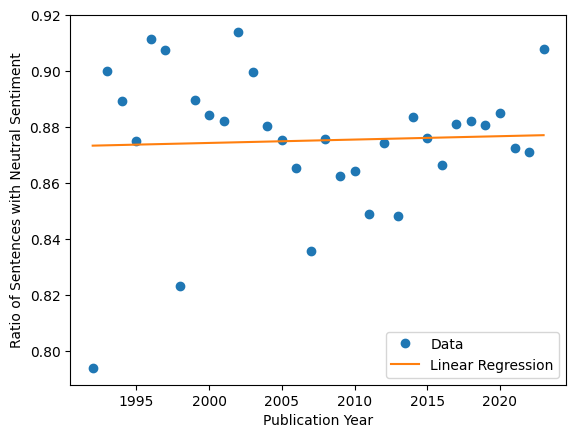

In [147]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/neutral_sentiment_sentences_ratio.png')
plt.show()

### Explore anomalies

In [148]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(20)

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment,positive,neutral,negative,sentences
2482,3YGK27B000DBC54M0000000,None,2023-08-10,2023,Lebensmittel Zeitung,Konzerne 14. Januar. Mit zahlreichen Aktivitat...,neutral,189.0,669.0,45.0,903.0
2432,3TF04P7000DBC38T0000000,None,2023-08-10,2023,Lebensmittel Zeitung,LZ: Unser heutiges Thema ist brandaktuell und ...,negative,115.0,480.0,303.0,898.0
2981,3SGDYHS0006XC4P80000000,None,1998-04-17,1998,Neue Zuercher Zeitung,Theater Opernhaus. Freitag: Jenufa. Von Janace...,neutral,93.0,401.0,102.0,596.0
2229,5KNN3CD1JC3P04FD0000000,Heute,2016-09-10,2016,Kölner Stadt-Anzeiger,"Samstag, 10.9. THEATER Köln Volksbühne am Rudo...",neutral,87.0,209.0,78.0,374.0
2101,4PYHHPR0TWTB81F20000000,Unter welchen Umständen würden deutsche Landwi...,2007-10-18,2007,Agrarwirtschaft,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
4875,6898GG31JCSCJ0G40000000,ÄNDERUNGSANTRÄGE 1 - 716 - Entwurf eines Beric...,2023-05-23,2023,European Parliament,Europäisches Parlament 2019-2024 Ausschuss für...,neutral,62.0,195.0,41.0,298.0
3931,4JXWDKF0TWRXK1R10000000,Stuttgart,2006-05-12,2006,Stuttgarter Nachrichten,"Theater Staatstheater, Opernhaus, Oberer Schlo...",neutral,58.0,505.0,95.0,658.0
2102,528XMT01JC10031V0000000,Aspekte der Agrarpolitik 2010,2011-03-01,2011,GJAE - German Journal of Agricultural Economic...,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
2106,624438W1DYG1P4NF0000000,Im Streit um die Nutztierhaltung: Gesellschaft...,2021-03-01,2021,GJAE - German Journal of Agricultural Economic...,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
154,4S4Y46D0TWX2707B0000000,None,2008-03-27,2008,None,"CHARLOTTENBURG- WILMERSDORF Broadway, Tauentzi...",neutral,51.0,226.0,40.0,317.0


In [149]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(20)

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment,positive,neutral,negative,sentences
2432,3TF04P7000DBC38T0000000,None,2023-08-10,2023,Lebensmittel Zeitung,LZ: Unser heutiges Thema ist brandaktuell und ...,negative,115.0,480.0,303.0,898.0
1290,64HSHSG1F15WB1NC0000000,Die helle Seite der Macht,2019-06-19,2019,Die ZEIT (inklusive ZEIT Magazin),Britta Stuff Der alte Machthaber hieÃY Shogun....,negative,33.0,380.0,107.0,520.0
2981,3SGDYHS0006XC4P80000000,None,1998-04-17,1998,Neue Zuercher Zeitung,Theater Opernhaus. Freitag: Jenufa. Von Janace...,neutral,93.0,401.0,102.0,596.0
3931,4JXWDKF0TWRXK1R10000000,Stuttgart,2006-05-12,2006,Stuttgarter Nachrichten,"Theater Staatstheater, Opernhaus, Oberer Schlo...",neutral,58.0,505.0,95.0,658.0
2229,5KNN3CD1JC3P04FD0000000,Heute,2016-09-10,2016,Kölner Stadt-Anzeiger,"Samstag, 10.9. THEATER Köln Volksbühne am Rudo...",neutral,87.0,209.0,78.0,374.0
1583,3S3BYJD0004YT4080000000,None,1998-01-29,1998,FACTS,"Der Meisterkoch aus dem Basler ""Bruderholz"" ue...",neutral,21.0,169.0,76.0,266.0
1272,5WCFTGJ1JDPTM1SS0000000,Die helle Seite der Macht,2019-06-19,2019,Die ZEIT (inklusive ZEIT Magazin),Der alte Machthaber hieß Shogun. Er starb uner...,neutral,33.0,397.0,75.0,505.0
4834,65W8TVG1F117G0H90000000,Raumschiff Enterprise hat mich infiziert,2022-07-09,2022,"taz, die tageszeitung",Interview Juliane Preiß Fotos Miguel Ferraz Ar...,neutral,26.0,118.0,73.0,217.0
202,4G9T7VX0TWX282W70000000,"Cornflakes classic, Cornflakes mit Schoko und ...",2000-08-26,2000,None,"Von Bohlen: Lassen Sie die Tür ruhig offen, ic...",neutral,19.0,215.0,73.0,307.0
2106,624438W1DYG1P4NF0000000,Im Streit um die Nutztierhaltung: Gesellschaft...,2021-03-01,2021,GJAE - German Journal of Agricultural Economic...,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0


In [150]:
print(df[df['nexis_id'] == '4JXWDKF0TWRXK1R10000000']['text'].values[0])
print(df[df['nexis_id'] == '3SGDYHS0006XC4P80000000']['text'].values[0])
print(df[df['nexis_id'] == '5KNN3CD1JC3P04FD0000000']['text'].values[0])

Theater Staatstheater, Opernhaus, Oberer Schlossgarten 6: Stuttgarter Ballett: Bigonzetti / Scholz / McGregor - mit den Choreografien "Kazimir's Colours", "Eden I Eden" und "Siebte Sinfonie", 19.30 Uhr. Schauspielhaus, Oberer Schlossgarten 6: Die sieben Raben, 11.30 Uhr. Warten auf Godot, 19.30 Uhr. Depot, Landhausstr. 188: Depot X: Humankapital, 20 Uhr. Altes Schauspielhaus, Kleine Königstraße 9: Der Widerspenstigen Zähmung, 20 Uhr. Theater unterm Dach: Iranische Nächte, 20.30 Uhr. Renitenz-Theater, Eberhardstr. 65: Der wüstenrote Neandertaler oder wie aus Affen Bausparer wurden - Kabarett mit Werner Koczwara, 20 Uhr. Komödie im Marquardt, Bolzstraße 4-6: Verzauberter April, 20 Uhr. Theater tri-bühne, Eberhardstraße 61 A (Kulturareal "Unterm Turm"): Nora, 20 Uhr. Theater der Altstadt, Rotebühlstraße 89: Heute abend: Lola Blau - mit Susanne Heydenreich und Alexander Reuter, 20 Uhr. Theater Rampe, Filderstraße 47: Premiere: Billy the Kid wird am Schluss erschossen - über den Mythos RAF 

In [151]:
'''# Remove articles with specific nexis_ids (tv program)
count_before = len(df.index)
df = df[df['nexis_id'] != '4SC3XK90TXHH10SS0000000']
df = df[df['nexis_id'] != '4SC3XKC0TXHH101J0000000']
df = df[df['nexis_id'] != '4SC3XKJ0TXHH101K0000000']
count_after = len(df.index)
print('\nNumber of articles removed: ' + str(count_before - count_after))

# reindex dataframe
df.reset_index(drop=True, inplace=True)'''

"# Remove articles with specific nexis_ids (tv program)\ncount_before = len(df.index)\ndf = df[df['nexis_id'] != '4SC3XK90TXHH10SS0000000']\ndf = df[df['nexis_id'] != '4SC3XKC0TXHH101J0000000']\ndf = df[df['nexis_id'] != '4SC3XKJ0TXHH101K0000000']\ncount_after = len(df.index)\nprint('\nNumber of articles removed: ' + str(count_before - count_after))\n\n# reindex dataframe\ndf.reset_index(drop=True, inplace=True)"